# Problem Set 3
## Problem 1: Posterior Predictive Tests


*For the non-hierarchical model and the control group half of the data set, choose a test statistic to show that the non-hierarchical model does not explain the control group data well. You should generate posterior data samples from this model and compare the test statistic of the real data to the distribution under your samples from the posterior. Note that the posterior distribution for this model is already provided in the notebook, so you don’t have to calculate it*

*Submit your test statistic function, your code for generating samples from the posterior and computing the test statistic, and a histogram analogous to Gelman Figure 6.4. Also, calculate and provide your p-value. Since the test statistic is supposed to show a deficiency of the model the p-value should be less than 0.05 or greater than 0.95*


### Model 1 Description (from pre-class work)


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |

All studies have the same probability of success.

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

### Model 1 (Non-Hierarchical)

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
# total patients per trial
control_patients = np.array([15, 18, 10, 39, 29, 10])

# total improved per trial
control_improved = np.array([9, 11, 4, 21, 12, 0])

# total not improved per trial
control_not_improved = control_patients - control_improved

# percentage improved per trial
control_improved_p = control_improved / control_patients

In [57]:
# given prior hyperparameters
alpha_prior = 1
beta_prior = 1

# compute posterior hyperparameters for the treatment group
alpha_post = alpha_prior + sum(control_improved)
beta_post = beta_prior + sum(control_not_improved)
posterior_control = sts.beta(a=alpha_post, b=beta_post)

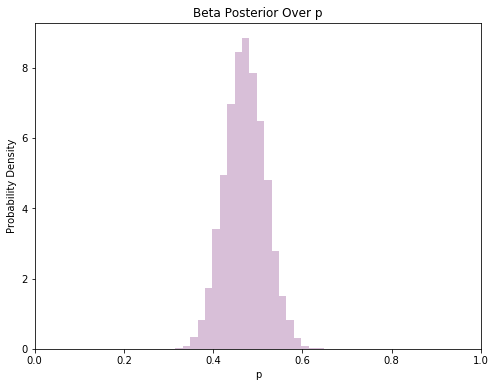

Expected Probability of Patient Improvement (p): 0.472
95% Confidence Interval Over p: [0.384, 0.560]


In [74]:
# plot the posterior
plt.figure(figsize=(8,6))

plot_hist = posterior_control.rvs(size=10000)
plt.hist(plot_hist, bins=20, density=True, color='thistle')

plt.title('Beta Posterior Over p')
plt.xlabel('p')
plt.ylabel('Probability Density')
plt.xlim(0, 1)
plt.show()

# describe posterior
print(
    'Expected Probability of Patient Improvement (p): %.3f' %
    (posterior_control.mean()))
print(
    '95%% Confidence Interval Over p: [%.3f, %.3f]' %
    (posterior_control.interval(0.95)))

### Model Checking

In [76]:
def posterior_control(alpha_prior, beta_prior, size=1):
    '''
    Generate N samples of x from the beta distribution.
    '''
    
    alpha_post = alpha_prior + sum(control_improved_p)
    beta_post = beta_prior + sum(control_improved_p)   
    
    # sample x from beta distribution
    x = sts.beta.rvs(a=alpha_post, b=beta_post, size=size)
    
    return x

In [77]:
# generate and iterate over samples from the posterior distribution
N = 10000

replicated_data = []

# generate N samples fom posterior distribution
for x in posterior_control(1, 1, size=N):
    
    trial_data = []
    
    # generate improved patients per trial
    for i in range(len(control_patients)):
        
        # binomial distribution for improved patients
        improved = sts.binom.rvs(p = x, 
                                 n = control_patients[i])
        
        # calculate probability of improvement (p)
        trial_p = improved / control_patients[i]
        
        trial_data.append(trial_p)
                
    replicated_data.append(trial_data)

print(f'Total Replicated Data: {len(replicated_data)}')
print(f'First Sample: {replicated_data[0]}')

Total Replicated Data: 10000
First Sample: [0.5333333333333333, 0.5, 0.3, 0.41025641025641024, 0.5172413793103449, 0.7]


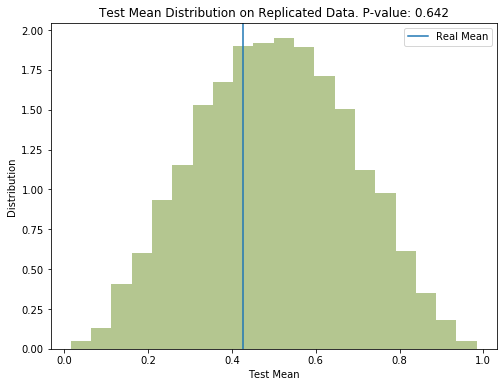

Replicated Average Mean: 0.5
Real Mean: 0.427
P-value: 0.6417


In [79]:
# compute real mean
real_mean = np.mean(control_improved_p)

# compute replicated data means
replicated_means = []
for i in replicated_data:
    replicated_mean = np.mean(i)
    replicated_means.append(replicated_mean)

    
plt.figure(figsize=(8, 6))
plt.hist(replicated_means, bins=20, alpha=0.5, 
         density=True, color='olivedrab')
plt.axvline(real_mean, label='Real Mean')

plt.title('Test Mean Distribution on Replicated Data. P-value: %.3f' % (
    np.mean(replicated_means > real_mean)))
plt.xlabel('Test Mean')
plt.ylabel('Distribution')

plt.legend()
plt.show()

# describe results
print(f'Replicated Average Mean: {np.round(np.mean(replicated_means),3)}')
print(f'Real Mean: {np.round(real_mean,3)}')
print(f'P-value: {np.mean(replicated_means > real_mean)}')

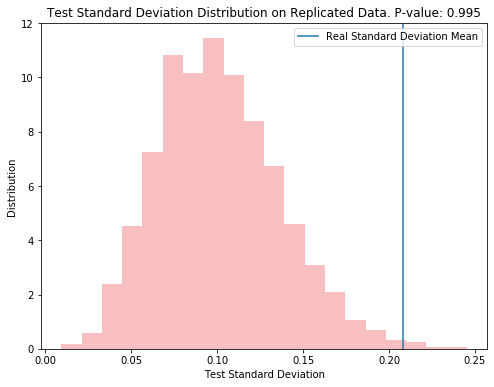

Replicated Average Standard Deviation: 0.183
Real Standard Deviation: 0.208
P-value: 0.9954


In [80]:
# compute real standard deviation
real_std = np.std(control_improved_p)

# compute replicated standard deviations
replicated_stds = []
for i in replicated_data:
    replicated_std = np.std(i)
    replicated_stds.append(replicated_std)

    
plt.figure(figsize=(8, 6))
plt.hist(replicated_stds, bins=20, alpha=0.5, 
         density=True, color='lightcoral')
plt.axvline(real_std, label='Real Standard Deviation Mean')

plt.title('Test Standard Deviation Distribution on Replicated Data. P-value: %.3f' % (
    np.mean(replicated_stds < real_std)))
plt.xlabel('Test Standard Deviation')
plt.ylabel('Distribution')

plt.legend()
plt.show()

# describe results
print(f'Replicated Average Standard Deviation: {np.round(np.std(replicated_means),3)}')
print(f'Real Standard Deviation: {np.round(real_std,3)}')
print(f'P-value: {np.mean(replicated_stds < real_std)}')

The Bayesian P-value for the standard deviation of the replicated data sets compared to the standard deviation of the real control data set for the probability of patients improved per trial is greater than 0.95. Therefore the non-hierarchical model does not explain the control group data well since P-values greater than 0.95 are considered unusual. The model should be altered so that it represents the real data with more accuracy.